In [35]:
import pandas as pd
from glob import glob
import os,json
import numpy as np
import re
import matplotlib.pyplot as plt
import unicodedata

# Load

In [22]:
from data.load import load_df_dataset,load_df_all_datasets

In [23]:
df_rohff = load_df_dataset("data/datasets/genius-1908-rohff/")
df_rohff["lyrics"]

Loading ['data/datasets/genius-1908-rohff\\df_genius_rohff_all_songs_202212.csv']


0      Dans ta race Lyrics[Couplet 1 : Rohff]\nJ'me p...
1      Appelle-moi Rohff Lyrics[Intro]\nRohff au micr...
2      Apprends à vivre Lyrics[Intro]\nJ't'apprends r...
3      Catastrohff Lyrics[Couplet 1]\nDémarrage hold-...
4      Du fond du cœur Lyrics[Intro]\nAu clair de la ...
                             ...                        
335    Kunta Sankara Lyrics[Refrain]\nKunta SankaraYo...
336    Le pouvoir 2 LyricsRefrain\n\nT’arrives comme ...
337            Numéro 1 LyricsAhYou might also likeEmbed
338    T ki LyricsA mort les juifs\nEt les arabes\nEt...
339    Zlatana (West Indies Remix) Lyrics[Intro]\nDeb...
Name: lyrics, Length: 340, dtype: object

In [84]:
df_datasets = load_df_all_datasets("data/datasets/")
df_datasets["lyrics"]

0        Memo Freestyle Lyrics[Hook]\nShe said the way ...
1        Présumé sobre Lyrics[Intro]\nC'est tellement l...
2        What’s my name? Lyrics[Couplet 1]\nMe demande ...
3        Au pays des droits de l’Homme Lyrics[Couplet 1...
4        Łapię za majka Lyrics(Kobo)\nWolę prawdę...\nW...
                               ...                        
23048    Sans direction Lyrics[Paroles de "Sans directi...
23049    Tata Fatima Lyrics[Paroles de "Tata Fatima"]\n...
23050    Y Lyrics[Paroles de "Y"]\n\n[Intro]\nHey, Y\nW...
23051    Booska Piccolo Lyrics[Paroles de "Booska Picco...
23052    Maria Lyrics[Paroles de "Maria"]\n\n[Intro]\nE...
Name: lyrics, Length: 23017, dtype: object

In [87]:
df_datasets["lyrics"].apply(type).unique()

array([<class 'str'>], dtype=object)

# Visualization de l'ensemble des datasets

## Caractérisque

In [25]:
df_datasets.shape

(23053, 156)

In [26]:
df_datasets.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23053 entries, 0 to 23052
Data columns (total 156 columns):
 #    Column                                                                        Dtype  
---   ------                                                                        -----  
 0    annotation_count                                                              int64  
 1    api_path                                                                      object 
 2    artist_names                                                                  object 
 3    full_title                                                                    object 
 4    header_image_thumbnail_url                                                    object 
 5    header_image_url                                                              object 
 6    id                                                                            int64  
 7    language                                                

In [27]:
df_datasets["artist"].unique()

array(['Kobo', 'Diddi Trix', 'Key Largo', '26Keuss', 'ZeGuerre', 'Badjer',
       'Zola', 'Flipp Dinero', 'Junior Bvndo', 'ScHoolboy Q',
       'Seth Gueko', 113, 'Zamdane', 'Lacrim', 'Cinco', 'Eddy de Pretto',
       'Diam’s', 'Zikxo', 'Sofiane', '\u200bDA Uzi', 'Moha La Squale',
       'Bolémvn', 'Heuss L’enfoiré', 'Koba LaD', 'Sexion d’Assaut',
       'Médine', 'Liim’s', 'Kery James', 'Kepler', 'Booba', 'Brvmsoo',
       '4Keus', 'OrelSan', 'PLK', 'CG6', 'Gucci Mane', 'La Fouine',
       'Alpha Wann', 'Nekfeu', 'MC Solaar', 'Captaine Roshi', 'Gims',
       'Sneazzy', 'Guizmo', 'Alonzo', 'Mister You', 'Jazzy Bazz',
       'Shotas', 'Yaro', 'Soprano', 'Demi Portion', 'Tiakola', 'R.E.D.K.',
       'Kaaris', 'Niro', 'Hatik', 'Luv Resval', 'Soso Maness', 'Dinos',
       'Gambino La MG', 'Fresh (BEL)', 'Jarod', 'Ateyaba', 'Nemir',
       'Sniper', 'Hugo TSR', 'Sadek', 'Josman', 'D4R', 'Ashe 22',
       'Psy 4 de la Rime', 'Lefa', 'Kodes', 'Lomepal', 'Sasso', 'Lesram',
       'Chily', 'Dee

In [28]:
df_datasets["lyrics"] = df_datasets["lyrics"].astype(str)

In [29]:
sorted(list(df_datasets.columns))

['album',
 'album.api_path',
 'album.artist.api_path',
 'album.artist.header_image_url',
 'album.artist.id',
 'album.artist.image_url',
 'album.artist.iq',
 'album.artist.is_meme_verified',
 'album.artist.is_verified',
 'album.artist.name',
 'album.artist.url',
 'album.cover_art_url',
 'album.full_title',
 'album.id',
 'album.name',
 'album.url',
 'annotation_count',
 'api_path',
 'apple_music_id',
 'apple_music_player_url',
 'artist',
 'artist_names',
 'current_user_metadata.excluded_permissions',
 'current_user_metadata.interactions.following',
 'current_user_metadata.interactions.pyong',
 'current_user_metadata.permissions',
 'custom_performances',
 'description.plain',
 'description_annotation._type',
 'description_annotation.annotatable.api_path',
 'description_annotation.annotatable.client_timestamps.lyrics_updated_at',
 'description_annotation.annotatable.client_timestamps.updated_by_human_at',
 'description_annotation.annotatable.context',
 'description_annotation.annotatable.i

## Preprocessing

In [97]:
from data.preprocessing import preprocess_genius_text
from tqdm.notebook import tqdm
tqdm.pandas()

In [61]:
text = df_rohff["lyrics"][0]
text = preprocess_genius_text(text)
print(text)
text

j'me poste sur le beat, j'attends qu'tu t'ramollisse, mc j'viens dégainer
ma mission sera tellement réussie qu'on dirait qu'tu t'es suicidé
aussi précis que l'enfoiré qu'a buté kennedy
j'défouraille comme ali, c'est hardcore pour n'importe quel mc
dans le guet-apens, on te saigne au mic comme dans la vie quotidienne
j'ajoute même pour les gens qui s'plaignent qu'ils aient la haine ou qu'ils nous craignent
faut pas tmennek, khouya y'a pas de détails y'a rien qu'des représailles
j'vois la caille, c'est pour le fun ou pour la maille
j'reste original, tu vois, y'a qu'moi qui peu-ra comme ça
comme las' montana, "wesh" y'en a pas deux comme moi !
attaque, contre-attaque dans les bacs virgin et la fnac
range le cash (?) puis 1664 pack
c'est mal dit puisqu'on parle mal on vit comme des "animals"
mais bon on s'en bat les couilles la france c'est pas not' pays natal !
(?) image j'ai bien choisi mon personnage
de-spee comme flash appelles-moi rohff, stylé en nettoyeur de tâche
au lieu qu'ils s'ca

'j\'me poste sur le beat, j\'attends qu\'tu t\'ramollisse, mc j\'viens dégainer\nma mission sera tellement réussie qu\'on dirait qu\'tu t\'es suicidé\naussi précis que l\'enfoiré qu\'a buté kennedy\nj\'défouraille comme ali, c\'est hardcore pour n\'importe quel mc\ndans le guet-apens, on te saigne au mic comme dans la vie quotidienne\nj\'ajoute même pour les gens qui s\'plaignent qu\'ils aient la haine ou qu\'ils nous craignent\nfaut pas tmennek, khouya y\'a pas de détails y\'a rien qu\'des représailles\nj\'vois la caille, c\'est pour le fun ou pour la maille\nj\'reste original, tu vois, y\'a qu\'moi qui peu-ra comme ça\ncomme las\' montana, "wesh" y\'en a pas deux comme moi !\nattaque, contre-attaque dans les bacs virgin et la fnac\nrange le cash (?) puis 1664 pack\nc\'est mal dit puisqu\'on parle mal on vit comme des "animals"\nmais bon on s\'en bat les couilles la france c\'est pas not\' pays natal !\n(?) image j\'ai bien choisi mon personnage\nde-spee comme flash appelles-moi rohff

## Verification des langues

cb de sons français, sons en anglais

combien de mots anglais, français, ou autres

## Les mots

In [81]:
df_datasets[~df_datasets['lyrics'].str.contains(r'a')]

TypeError: bad operand type for unary ~: 'float'

  0%|          | 0/340 [00:00<?, ?it/s]

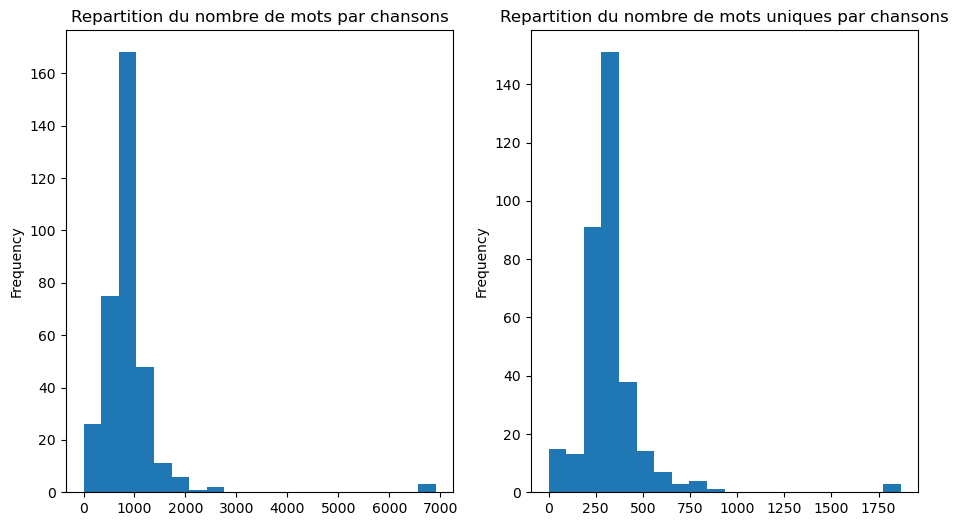

In [98]:
def plot_words_counts_histograms(df):

    df["lyrics_words"] = df['lyrics'].progress_apply(lambda x: preprocess_genius_text(x,lemmatization=False,stop_words_removal=False, punct_removal=False, token_output=True) )
    df["lyrics_words_count"] = df['lyrics_words'].apply(lambda x: len(x))
    df["lyrics_unique_words_count"] = df['lyrics_words'].apply(lambda x: len(set(x)))

    plt.figure(figsize=(11,6))
    ax = plt.subplot(1,2,1)
    ax.set_title("Repartition du nombre de mots par chansons")
    df["lyrics_words_count"].plot.hist(bins=20)

    ax = plt.subplot(1,2,2)
    ax.set_title("Repartition du nombre de mots uniques par chansons")
    df["lyrics_unique_words_count"].plot.hist(bins=20)

    plt.show()
    return df

plot_words_counts_histograms(df_rohff)

In [ ]:
df_datasets[["lyrics_words_count","lyrics_unique_words_count"]].describe()

C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_18016\3746072511.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_datasets.groupby("artist").mean()["lyrics_words_count"].sort_values()[:cb].plot(kind="barh")
C:\Users\CYTech Student\AppData\Local\Temp\ipykernel_18016\3746072511.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_datasets.groupby("artist").mean()["lyrics_unique_words_count"].sort_values()[:cb].plot(kind="barh")


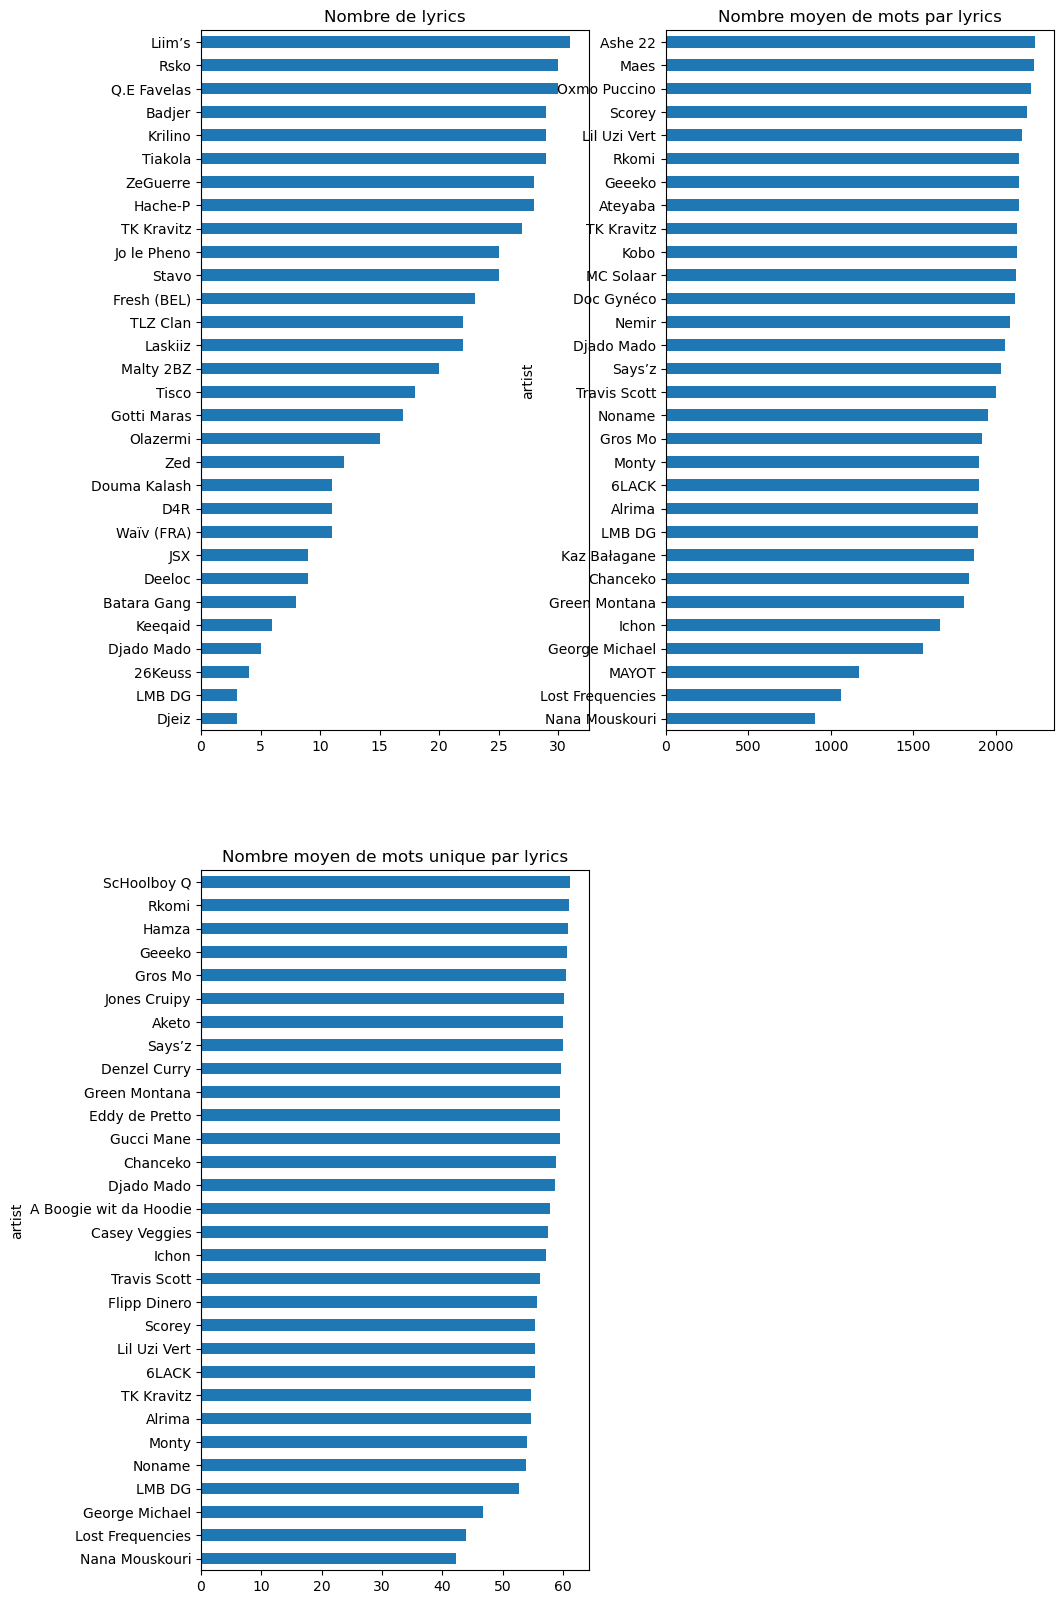

In [99]:
cb = 30
plt.figure(figsize=(11,20))
ax = plt.subplot(2,2,1)
ax.set_title("Nombre de lyrics")
df_datasets.artist.value_counts().sort_values()[:cb].plot(kind='barh')

ax = plt.subplot(2,2,2)
ax.set_title("Nombre moyen de mots par lyrics")
df_datasets.groupby("artist").mean()["lyrics_words_count"].sort_values()[:cb].plot(kind="barh")

ax = plt.subplot(2,2,3)
ax.set_title("Nombre moyen de mots unique par lyrics")
df_datasets.groupby("artist").mean()["lyrics_unique_words_count"].sort_values()[:cb].plot(kind="barh")

plt.show()

In [43]:
df[["artist_names","title","album.name","lyrics","release_date"]]

,artist_names,title,album.name,lyrics,release_date
0,Kobo,Memo Freestyle,NaN,Memo Freestyle Lyrics[Hook]\nShe said the way ...,2016-10-15
1,Kobo,Présumé sobre,NaN,Présumé sobre Lyrics[Intro]\nC'est tellement l...,2016-12-12
2,Kobo,What’s my name?,NaN,What’s my name? Lyrics[Couplet 1]\nMe demande ...,2016-08-12
3,Kobo,Au pays des droits de l’Homme,Tueurs (B.O.),Au pays des droits de l’Homme Lyrics[Couplet 1...,2017-12-01
4,Kobo (Ft. Zdero),Łapię za majka,NaN,Łapię za majka Lyrics(Kobo)\nWolę prawdę...\nW...,2017-07-04
...,...,...,...,...,...
18926,Q.E Favelas (Ft. Leto),La mélodie du bonchar,Bendo X,"La mélodie du bonchar Lyrics[Paroles de ""La mé...",2020-01-17
18927,Q.E Favelas,Q.E Favelas,NaN,Q.E Favelas LyricsTranscribingYou might also l...,NaN
18928,Q.E Favelas,Rafale #2,NaN,Rafale #2 LyricsWhatYou might also likeEmbed,NaN
18929,Q.E Favelas,Rafale #3,NaN,Rafale #3 Lyrics[Couplet Ibrak]\nPourquoi tu v...,NaN
